# Deep Reinforcement Learning for OpenAI's "cartpole-v0"

In this notebook, we will perform the experiments, do hyperparameters tuning and visualize the results.

The agent classes are in the Python module agents.DQNforCartpole. 
We will first import the DQN agent and perform a number of experiments with it. 

For logging and visualization, the files logz.py and plot.py are used. They have been 
taken from UC Berkeley's course on deep reinforcement learning, homework 2, available here: https://github.com/berkeleydeeprlcourse/homework/tree/master/hw2 

In [1]:
from agents.DQNforCartpole import DQNforCartpole
from environments import Environments
import os, time
from util.plotting import plot_result


Using TensorFlow backend.


In [2]:
# create the cartpole environment
env = Environments.importCartpole()


Importing environment CartPole-v0
----------------------------------
CartPole-v0's action space:       Discrete(2)
CartPole-v0's observation space:  Box(4,)

For the cartpole environment, the observation space is: 
obs[0]: the horizontal position of the cart (0.0 = center)
obs[1]: the velocity of the cart (0.0 = standing still)
obs[2]: the angle of the pole (0.0 = vertical)
obs[3]: the angular velocity of the cartpole (0.0 = standing still)


In [3]:
# benchmark model: Mnih-2015
dqn1 = DQNforCartpole(environment=env,
                      learning_rate=0.0005,
                      discount_rate=0.99,
                      exploration_rate=1.0,
                      exploration_rate_min=0.1,
                      exploration_rate_decay=0.999,
                      replay_memory_capacity=10000, # different from Mnih
                      replay_sampling_batch_size=2,
                      nn_architecture=[10],
                      replay_start_size=32,
                      exp_name="dqn1"
                      )

Initializing DQN agent...
 .... dimension of state space: 4
 .... dimension of action space: 2


In [4]:
# benchmark model: Mnih-2015
dqn2 = DQNforCartpole(environment=env,
                      learning_rate=0.00025,
                      discount_rate=0.99,
                      exploration_rate=1.0,
                      exploration_rate_min=0.1,
                      exploration_rate_decay=0.999,
                      replay_memory_capacity=10000, # different from Mnih
                      replay_sampling_batch_size=2,
                      nn_architecture=[10],
                      replay_start_size=32,
                      exp_name="dqn2"
                      )

Initializing DQN agent...
 .... dimension of state space: 4
 .... dimension of action space: 2


In [5]:
allDQNs = [dqn1, dqn2]

list_of_logdirs = [] # needed for visualization later

for i in range(len(allDQNs)):
    # make directory for experiment
    if not(os.path.exists('data')):
        os.makedirs('data')
    logdir = "DQN"+'-cartpole' + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
    logdir = os.path.join('data', logdir)
    if not(os.path.exists(logdir)):
        os.makedirs(logdir)
        
    # append current logdir to list_of_logdirs for visualizaton later on
    list_of_logdirs.append(logdir)

    allDQNs[i].run_numberOfTrials_experiments(numberOfTrials=2,
                                              numberOfEpisodesForEachTrial=50,
                                              logdir=logdir
                                             )


Logging data to data/DQN-cartpole_26-01-2018_14-28-34/trial_1/log.txt
Starting new trial
---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |               1 |
|                    Time |           0.432 |
|           AverageReturn |            19.5 |
|               StdReturn |            6.25 |
|               MaxReturn |              35 |
|               MinReturn |               9 |
|                 Epsilon |           0.999 |
|               EpLenMean |            19.5 |
|                EpLenStd |            6.25 |
| AvgScoresFor100Episodes |            18.5 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |               2 |
|                    Time |           0.437 |
|           AverageReturn |          

---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              48 |
|                    Time |           0.633 |
|           AverageReturn |            21.2 |
|               StdReturn |            8.15 |
|               MaxReturn |              48 |
|               MinReturn |               9 |
|                 Epsilon |           0.953 |
|               EpLenMean |            21.2 |
|                EpLenStd |            8.15 |
| AvgScoresFor100Episodes |            20.2 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              49 |
|                    Time |           0.639 |
|           AverageReturn |            21.7 |
|               StdReturn |            9.06 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              13 |
|                    Time |            0.17 |
|           AverageReturn |            22.7 |
|               StdReturn |            11.3 |
|               MaxReturn |              57 |
|               MinReturn |               9 |
|                 Epsilon |           0.987 |
|               EpLenMean |            22.7 |
|                EpLenStd |            11.3 |
| AvgScoresFor100Episodes |            21.7 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              14 |
|                    Time |           0.175 |
|           AverageReturn |            22.7 |
|               StdReturn |            11.2 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |               1 |
|                    Time |            0.13 |
|           AverageReturn |            24.3 |
|               StdReturn |            12.7 |
|               MaxReturn |              56 |
|               MinReturn |              10 |
|                 Epsilon |           0.999 |
|               EpLenMean |            24.3 |
|                EpLenStd |            12.7 |
| AvgScoresFor100Episodes |            23.3 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |               2 |
|                    Time |           0.134 |
|           AverageReturn |            23.9 |
|               StdReturn |            12.8 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              47 |
|                    Time |           0.331 |
|           AverageReturn |            21.4 |
|               StdReturn |            11.7 |
|               MaxReturn |              60 |
|               MinReturn |               8 |
|                 Epsilon |           0.954 |
|               EpLenMean |            21.4 |
|                EpLenStd |            11.7 |
| AvgScoresFor100Episodes |            20.4 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              48 |
|                    Time |           0.336 |
|           AverageReturn |            21.3 |
|               StdReturn |            11.7 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              46 |
|                    Time |           0.384 |
|           AverageReturn |            24.1 |
|               StdReturn |            12.8 |
|               MaxReturn |              79 |
|               MinReturn |               9 |
|                 Epsilon |           0.955 |
|               EpLenMean |            24.1 |
|                EpLenStd |            12.8 |
| AvgScoresFor100Episodes |            23.1 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              47 |
|                    Time |           0.388 |
|           AverageReturn |              24 |
|               StdReturn |            12.7 |
|               MaxReturn |       

/home/pblies/programs/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


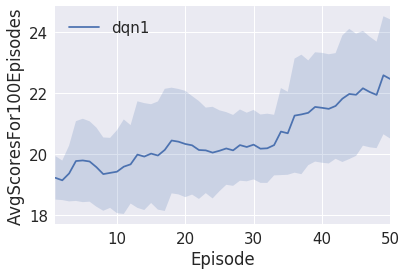

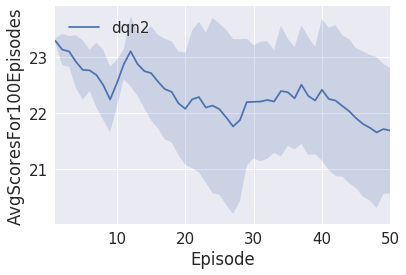

In [6]:
for experiment in list_of_logdirs:
    plot_result(experiment, 'AvgScoresFor100Episodes')